## Linear Regression with Multiple Features


* First we import the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

* Now we take the training set.

In [2]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35],[1800, 4, 2, 30]])
y_train = np.array([460, 232, 178, 420])


### 📏 Feature Scaling in Multiple Feature Linear Regression

When we have multiple features (x₁, x₂, …, xₙ), their values can be on very different scales.
For example:
- Size of house (in 1000s of sq.ft) → 1 to 10  
- Number of bedrooms → 1 to 5  
- Price → thousands or lakhs

➡️ The problem:
If features are not scaled, **gradient descent becomes very slow** or may even fail to converge properly.
That’s because features with larger numeric ranges dominate the cost function, causing the algorithm
to "zig-zag" during optimization instead of smoothly descending.

---

### 🔹 Two Main Types of Feature Scaling:

1. **Min-Max Normalization (Rescaling)**
   - Formula:  
     x_scaled = (x - x_min) / (x_max - x_min)
   - Transforms all values to a range between **0 and 1**.
   - Works well when the data has a known and fixed range.

2. **Standardization (Z-score Normalization)**
   - Formula:  
     x_scaled = (x - mean(x)) / std(x)
   - Centers the data around **mean = 0** with **std = 1**.
   - More robust when data doesn’t have a fixed range or has outliers.
   - Commonly used before applying gradient descent or ML algorithms.

---

### 💡 In Practice:
For multiple feature linear regression, we typically use **standardization** because:
- It ensures all features contribute equally.
- It speeds up convergence during gradient descent.
- It improves numerical stability.

Example:

    mean = np.mean(x_train, axis=0)

    std = np.std(x_train, axis=0)

    x_scaled = (x_train - mean) / std

In [3]:
mu = np.mean(x_train,axis=0)
sigma = np.std(x_train,axis=0)
x_train=(x_train-mu)/sigma
print(x_train)

[[ 1.19989363  1.34164079 -1.          1.34164079]
 [-0.27163367 -0.4472136   1.          0.4472136 ]
 [-1.47794385 -1.34164079 -1.         -0.4472136 ]
 [ 0.54968389  0.4472136   1.         -1.34164079]]


In [14]:
# m is the number of features
# n is the number of training examples
m=x_train.shape[1]
print(m)

4


In [15]:
w = np.zeros(m)
b = 0

### 🧮 Compute Functions for Multiple Linear Regression

Now we define the three essential functions needed for gradient descent:
1. compute_cost() – to calculate how far our predictions are from actual values.
2. compute_gradient() – to find the direction to update weights and bias.
3. compute_prediction() – to predict outputs using current parameters.

# Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{1}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{2} $$

In [13]:
def compute_cost(w,b,x,y):
  m=x.shape[0]
  cost = 0
  for i in range(m):
    dot = np.dot(x[i],w)
    diff = dot + b - y[i]
    cost += diff**2
  return cost/(2*m)

# 5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{3}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{4}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{5}
\end{align}
$$
* m is the number of training examples in the data set

In [11]:
def compute_gradient(w,b,x,y):
  m=x.shape[0]
  n=x.shape[1]
  dj_dw=np.zeros(n)
  dj_db=0
  for i in range(m):
    dot = np.dot(w,x[i])
    diff = dot + b - y[i]
    for j in range(n):
      dj_dw[j]+= diff * x[i,j]
    dj_db+= diff
  return dj_dw/m, dj_db/m


In [14]:
def compure_prediction(w,b,x):
  n = x.shape[0]
  predict = np.zeros(n)
  for i in range(n):
    dot = np.dot(w,x[i])
    predict[i] = dot+b
  return predict

In [19]:
compute_cost(w,b,x_train,y_train)

np.float64(59188.5)

* Now we have got all the tools to perform gradient descent.
* Let's go and code the final part.

In [9]:
def perform_gradient_descent(w,b,x,y,alpha,iterations):
  j_his=[]
  current_cost=compute_cost(w,b,x,y)
  print(f"initial cost is {current_cost}\n")
  j_his.append(current_cost)
  for i in range(iterations):
    dj_dw,dj_db=compute_gradient(w,b,x,y)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db
    current_cost= compute_cost(w,b,x,y)
    j_his.append(current_cost)
    if i%(iterations//10)==0:
      print(f"current cost = {current_cost} w = {w} b = {b} dj_db = {dj_db}\n")
  return j_his,w,b

In [21]:
cost_history,w,b=perform_gradient_descent(w,b,x_train,y_train,0.0001,10000000)

initial cost is 59188.5

current cost = 59175.42092432751 w = [0.01141813 0.01156047 0.00035    0.00194538] b = 0.03225 dj_db = -322.5

current cost = 4.410712576315071e-20 w = [ 63.18719507  69.56916379 -23.75428041 -41.29944596] b = 322.49999999971584 dj_db = -2.8416025088517927e-10

current cost = 4.410712576315071e-20 w = [ 63.18719507  69.56916379 -23.75428041 -41.29944596] b = 322.49999999971584 dj_db = -2.8416025088517927e-10

current cost = 4.410712576315071e-20 w = [ 63.18719507  69.56916379 -23.75428041 -41.29944596] b = 322.49999999971584 dj_db = -2.8416025088517927e-10

current cost = 4.410712576315071e-20 w = [ 63.18719507  69.56916379 -23.75428041 -41.29944596] b = 322.49999999971584 dj_db = -2.8416025088517927e-10

current cost = 4.410712576315071e-20 w = [ 63.18719507  69.56916379 -23.75428041 -41.29944596] b = 322.49999999971584 dj_db = -2.8416025088517927e-10

current cost = 4.410712576315071e-20 w = [ 63.18719507  69.56916379 -23.75428041 -41.29944596] b = 322.499999

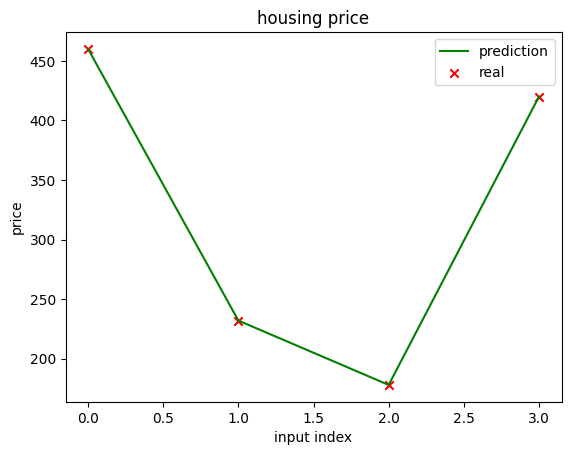

[460. 232. 178. 420.]


In [22]:
predict = compure_prediction(w,b,x_train)
plt.plot(range(x_train.shape[0]),predict,c="green",label="prediction")
plt.scatter(range(x_train.shape[0]),y_train,c="red",marker="x",label="real")
plt.xlabel("input index")
plt.ylabel("price")
plt.title("housing price")
plt.legend()
plt.show()
print(predict)

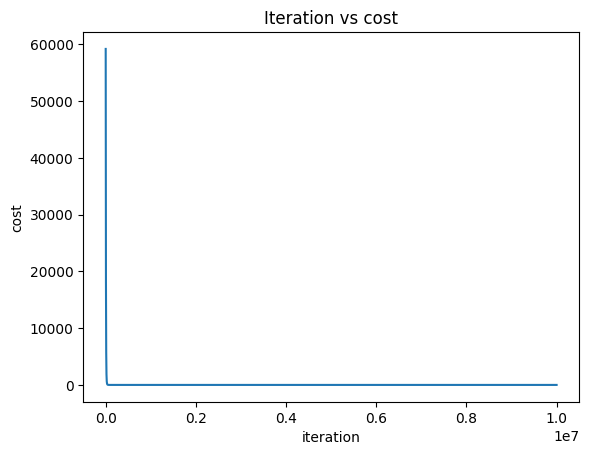

In [23]:
plt.plot(range(10000001),cost_history)
plt.xlabel("iteration")
plt.ylabel("cost")
plt.title("Iteration vs cost")
plt.show()

In [43]:
x_house = np.array([1200, 3, 1, 40])
x_house = (x_house-mu)/sigma
print(x_house)
print(np.dot(x_house,w)+b)

[-0.73362481 -0.4472136  -1.          0.4472136 ]
250.3166370500767


## 🧮 Normal Equation in Multi-Feature Linear Regression

When working with multiple features, finding the optimal weights (coefficients) is essential for accurate predictions. There are two main approaches:

---

### ⚡ The Normal Equation: Closed-Form Solution

The normal equation provides a direct, non-iterative way to calculate weights:
$\
\theta = (X^T X)^{-1} X^T y
\$$

- \(X\): Feature matrix with a column of ones for the intercept
- \(y\): Target variable vector
- \(\theta\): Learned weights

If the feature matrix is not invertible, use the Moore-Penrose pseudo-inverse for stability:
\$
[
\theta = \text{pinv}(X)\ y
\]$


---

### 💡 When Does Gradient Descent Match The Normal Equation?

If data preprocessing (scaling, bias column, feature order) is consistent, both approaches minimize the same cost function and should yield nearly identical weights and predictions. This is due to the convex nature of the linear regression cost function—there’s only one global minimum.

---

### 🆚 Comparing Both Approaches

| Method             | Pros                      | Cons                                  |
|--------------------|--------------------------|---------------------------------------|
| Gradient Descent   | Works on big data, flexible | Needs iterations, scaling required    |
| Normal Equation    | Fast (small data), no tuning   | May fail with non-invertible matrix   |

---

### 🚩 Common Pitfalls

- Forgetting to add a bias (intercept) column for the normal equation
- Different feature preprocessing between methods
- Using `np.linalg.inv` on non-invertible matrices (prefer `np.linalg.pinv`)
- Comparing weights with mismatched feature order

---

### 📋 Summary

Both gradient descent and the normal equation are foundational for multiple linear regression. When set up properly, comparing their results validates correct implementation, improves model understanding, and strengthens confidence in the results.


In [45]:
# Add bias term (column of ones)
X_b = np.c_[np.ones((x_train.shape[0], 1)), x_train]  # shape (m, n+1)

# Use pseudo-inverse to ensure stability
theta = np.linalg.pinv(X_b) @ y_train
print(f"{theta[1:]} {theta[0]}")
print(w,b)

[ 63.18719507  69.56916379 -23.75428041 -41.29944596] 322.5
[ 63.18719507  69.56916379 -23.75428041 -41.29944596] 322.49999999971584


In [46]:
print(compute_cost(theta[1:],theta[0],x_train,y_train))
print(compute_cost(w,b,x_train,y_train))

8.582806648804608e-27
4.410712576315071e-20


"""
## 🧩 Feature Engineering — Making Data More Useful for the Model

After loading and cleaning the dataset, the next important step before training our model
is **Feature Engineering**. It focuses on improving the quality and structure of our input features
so that the model can learn patterns more effectively.

In Linear Regression, we assume a *linear* relationship between inputs (features) and output (target).
However, raw data often doesn’t directly follow this pattern — and that’s where feature engineering helps.

---

### 🔹 Why We Need Feature Engineering

- Features may not be on the same scale or may contain skewed distributions.
- Some relationships between input and output may be nonlinear.
- Categorical (non-numeric) data cannot be directly used in regression.
- Irrelevant or correlated features can confuse the model.

Feature engineering ensures the dataset is **clean, well-scaled, and informative**.

---

### 🔹 Common Techniques in Feature Engineering

1. **Feature Creation**
   - Creating new features from existing ones to capture more patterns.
   - Example: adding polynomial terms like `size²` or combining features like `size * rooms`.

2. **Feature Transformation**
   - Applying mathematical transformations to reduce skewness or make relationships more linear.
   - Example: log or square root transformations.

3. **Handling Categorical Features**
   - Converting non-numeric categories (like city names or types) into numeric form
     using **One-Hot Encoding** or **Label Encoding**.

4. **Feature Scaling**
   - Standardizing or normalizing features so all of them have comparable ranges.
   - Essential for gradient descent-based algorithms.

5. **Feature Selection**
   - Removing irrelevant or redundant features to simplify the model and reduce overfitting.

---

### 💡 In short:
Feature Engineering is the process of turning **raw data → structured, meaningful input**
so that our Linear Regression model can perform efficiently and accurately.
"""


In [2]:
import numpy as np

In [3]:
# 🏠 Example dataset
# ---------------------------
# Columns: size (sqft), bedrooms, age, city (encoded manually)
# We'll use integers for city: 0 = Delhi, 1 = Mumbai, 2 = Kolkata

X_base = np.array([
    [850, 2, 10, 0],
    [900, 3, 5, 0],
    [1200, 3, 15, 1],
    [1500, 4, 20, 2],
    [1850, 4, 7, 1],
    [2400, 5, 3, 0]
], dtype=float)

y = np.array([7.0, 7.6, 10.0, 12.0, 14.0, 16.0]) * 1e6  # target: price

In [4]:
# 🔹 1. Feature Creation
# ---------------------------

# Feature 0 = size, Feature 1 = bedrooms, Feature 2 = age
size = X_base[:, 0]
bedrooms = X_base[:, 1]
age = X_base[:, 2]

# Create new features
size_squared = size ** 2
age_sqrt = np.sqrt(age)
size_bedroom_interaction = size * bedrooms

# Stack all features horizontally
X_new = np.column_stack((X_base, size_squared, age_sqrt, size_bedroom_interaction))

print("Shape before scaling:", X_new.shape)
print("\nSample features before scaling (first 3 rows):\n", X_new[:3])


Shape before scaling: (6, 7)

Sample features before scaling (first 3 rows):
 [[8.50000000e+02 2.00000000e+00 1.00000000e+01 0.00000000e+00
  7.22500000e+05 3.16227766e+00 1.70000000e+03]
 [9.00000000e+02 3.00000000e+00 5.00000000e+00 0.00000000e+00
  8.10000000e+05 2.23606798e+00 2.70000000e+03]
 [1.20000000e+03 3.00000000e+00 1.50000000e+01 1.00000000e+00
  1.44000000e+06 3.87298335e+00 3.60000000e+03]]


In [5]:
# 🔹 2. One-Hot Encode the 'city' feature (manually)
# ---------------------------
# City column index = 3 in X_base (values 0, 1, 2)
cities = X_base[:, 3].astype(int)
unique_cities = np.unique(cities)

# Create one-hot encoded columns (excluding one to avoid dummy trap)
one_hot = np.zeros((len(cities), len(unique_cities) - 1))
for i in range(len(cities)):
    if cities[i] == 1:   # Mumbai
        one_hot[i, 0] = 1
    elif cities[i] == 2: # Kolkata
        one_hot[i, 1] = 1

# Remove old city column and add one-hot columns
X_no_city = np.delete(X_new, 3, axis=1)
X_final = np.hstack((X_no_city, one_hot))

print("\nShape after one-hot encoding:", X_final.shape)
print("Sample data after encoding (first 3 rows):\n", X_final[:3])



Shape after one-hot encoding: (6, 8)
Sample data after encoding (first 3 rows):
 [[8.50000000e+02 2.00000000e+00 1.00000000e+01 7.22500000e+05
  3.16227766e+00 1.70000000e+03 0.00000000e+00 0.00000000e+00]
 [9.00000000e+02 3.00000000e+00 5.00000000e+00 8.10000000e+05
  2.23606798e+00 2.70000000e+03 0.00000000e+00 0.00000000e+00]
 [1.20000000e+03 3.00000000e+00 1.50000000e+01 1.44000000e+06
  3.87298335e+00 3.60000000e+03 1.00000000e+00 0.00000000e+00]]


In [6]:
# 🔹 3. Feature Scaling
# ---------------------------

# Standardization: (x - mean) / std
mean = np.mean(X_final, axis=0)
std = np.std(X_final, axis=0)
X_scaled = (X_final - mean) / std

print("\nShape after scaling:", X_scaled.shape)
print("Scaled features (first 3 rows):\n", X_scaled[:3])

# ✅ Final features and targets ready
print("\n✅ X_scaled and y are now ready for multiple linear regression training.")


Shape after scaling: (6, 8)
Scaled features (first 3 rows):
 [[-1.09850076 -1.5666989   0.         -0.95268373  0.15158776 -1.11641728
  -0.70710678 -0.4472136 ]
 [-1.00695903 -0.52223297 -0.84920778 -0.90301551 -0.83669639 -0.82768868
  -0.70710678 -0.4472136 ]
 [-0.45770865 -0.52223297  0.84920778 -0.54540434  0.90992486 -0.56783293
   1.41421356 -0.4472136 ]]

✅ X_scaled and y are now ready for multiple linear regression training.


In [16]:
w = np.zeros(X_scaled.shape[1])
b = 0

In [19]:
cost_history,w,b=perform_gradient_descent(w,b,X_scaled,y,0.0001,10000000)

initial cost is 187292887.92905453

current cost = 187292052.16307512 w = [1325509.43851539  -55076.35456984 -395161.09540974 1006348.52491042
   23595.48311818  716436.56327887  834157.82948832  905556.56840778] b = 11099999.999999909 dj_db = -9.158005317052205e-08

current cost = 2160439.1346363504 w = [1363359.12554767 -126723.32816958 -439870.15297708 1023928.20239302
   18225.30153555  708978.11425711  856773.92167821  968056.57724687] b = 11099999.999999909 dj_db = -9.12696123123169e-08

current cost = 24920.957406734004 w = [1367424.24601018 -134418.33357999 -444671.98647262 1025816.28703523
   17648.53182806  708177.06225038  859202.93219804  974769.19162344] b = 11099999.999999909 dj_db = -9.12696123123169e-08

current cost = 287.4666118182832 w = [1367860.84704757 -135244.79060041 -445187.7117765  1026019.07062336
   17586.58575413  708091.0278658   859463.81217017  975490.13813113] b = 11099999.999999909 dj_db = -9.12696123123169e-08

current cost = 3.315966219227322 w = [13

Now lets plot the cost after each iteration.
* Note that this plot should go down and then have an asymptote near 0, this shows that the cost lowered initially and then went towards 0

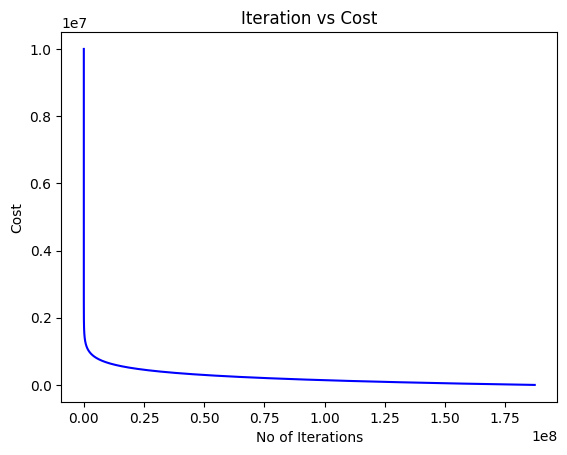

In [23]:
import matplotlib.pyplot as plt
plt.plot(cost_history, range(len(cost_history)),c='blue')
plt.title("Iteration vs Cost")
plt.xlabel("No of Iterations")
plt.ylabel("Cost")
plt.show()

Now lets plot the graph to check whether the model fits with the training set

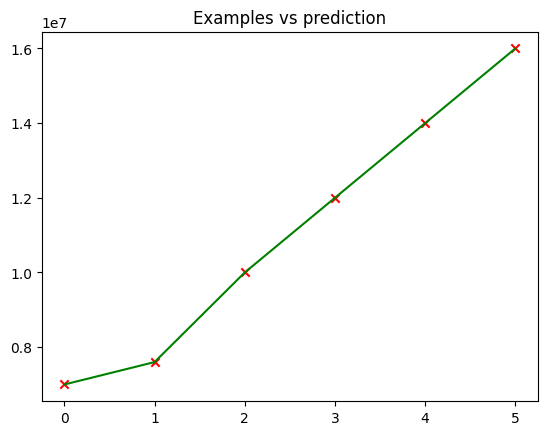

In [24]:
plt.scatter(range(X_scaled.shape[0]),y,c='red',marker="x")
plt.plot(range(X_scaled.shape[0]),compure_prediction(w,b,X_scaled),c='green')
plt.title("Examples vs prediction")
plt.show()

* Below we try to check whether the solution that we got are correct, ie they match with the ones that we get through solving the normal equation.

In [25]:
# Add bias term (column of ones)
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]  # shape (m, n+1)

# Use pseudo-inverse to ensure stability
theta = np.linalg.pinv(X_b) @ y
print(f"{theta[1:]} {theta[0]}")
print(w,b)

[1367913.38099977 -135344.2339133  -445249.76634374 1026043.47052718
   17579.13210238  708080.67579178  859495.20251241  975576.88590792] 11100000.000000011
[1367913.38095405 -135344.23389229 -445249.76633452 1026043.4705319
   17579.13210929  708080.67581901  859495.20250851  975576.88588995] 11099999.999999909


## Congratulations
### You have learnt multiple feature linear regression
